<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_2_train_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StyleGAN2-ADA for Pokemon Fusions!
By Moeed, Danvi & Michael

Implementation credit to Jeff Heaton whose youtube video we used to implement the StyleGAN.

# Setting up for StyleGAN

## Mounting Google CoLab

We'll be storing in and out of google drive. We are mounting the drive here in the code below.

In [ ]:

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Installing the required packages

In [ ]:
!pip uninstall jax jaxlib -y
!pip install "jax[cuda11_cudnn805]==0.3.10" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install torch==1.8.1 torchvision==0.9.1
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja

Found existing installation: jax 0.3.10
Uninstalling jax-0.3.10:
  Successfully uninstalled jax-0.3.10
Found existing installation: jaxlib 0.3.10+cuda11.cudnn805
Uninstalling jaxlib-0.3.10+cuda11.cudnn805:
  Successfully uninstalled jaxlib-0.3.10+cuda11.cudnn805
Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
  Using cached jax-0.3.10-py3-none-any.whl
  Using cached https://storage.googleapis.com/jax-releases/cuda11/jaxlib-0.3.10%2Bcuda11.cudnn805-cp310-none-manylinux2014_x86_64.whl (175.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.10 which is incompatible.
flax 0.7.4 requires jax>=0.4.2, but you have jax 0.3.10 which is incompatible.
orbax-checkpoint 0.4.1 requires jax>=0.4.9, but you have jax 0.3.10 which is incompatible.
ERROR: Could not find a version that sat

## Finding Files

The drive is mounted to the following location.

```
/content/drive/MyDrive/data
```

We use the ```ls``` command to establish the exact path for our images.

In [ ]:
!ls /content/drive/MyDrive/data/gan/images/resized/

## Converting Images

Our images need to be in the correct dimensions to work. In this step we ready out dataset by retriving it to the local drive and then converting it so that it can be used. We learned (the hard way) that images need to be square shaped with exact dimensions in powers of two.

In [ ]:
#Importing the dataset into local storage to work faster
!rm -r /content/images/
!unzip  /content/drive/MyDrive/data/sprite_v2.zip -d /content/images/

In [ ]:
# Change dimensions
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = '/content/images/sprite/Test/'
SAVED_IMAGE_PATH = '/content/images/processed/'
files = [f for f in listdir(IMAGE_PATH) if (isfile(join(IMAGE_PATH, f)))]

# and os.path.splitext(join(IMAGE_PATH, f))[1].lower() != ".zip" )]

valid_extensions = ('.png')

# first_some = files[:100]

print(files)

desired_size = (256, 256)

for f in tqdm(files):
  # print(f)
  file_path = join(IMAGE_PATH,f)
  # print(file_path)
  if f.lower().endswith(valid_extensions):
    try:
      # Attempt to open the file as an image using Pillow
      img = Image.open(file_path)
      img = img.convert("RGB")
      resized_img = img.resize(desired_size, Image.LANCZOS)
      # print(f"Saving {join(SAVED_IMAGE_PATH,f)} with dimensions {resized_img.size} with mode {resized_img.mode}" )
      resized_img.save(join(SAVED_IMAGE_PATH,f))
    except Exception as e:
      print(e)
      # If it fails to open as an image, remove the file
      # print("I would remove ", file_path, f.lower().endswith(valid_extensions))
      # break
      os.remove(file_path)
      print(f"Removed non-image file: {f}")
  else:
    # print("I would remove ", file_path, f.lower().endswith(valid_extensions))
    # break
    os.remove(file_path)
    print(f"Removed non-image file: {f}")



['397.253.png', '321.321a.png', '339.286b.png', '339.237.png', '144.294.png', '215.403.png', '322.243.png', '112.36.png', '190.187.png', '339.219.png', '415.415.png', '294.4.png', '84.228.png', '155.228.png', '419.6.png', '181.208.png', '222.386.png', '3.50.png', '60.7.png', '142.332.png', '360.399a.png', '220.6.png', '40.271.png', 'solrock_front_default.png', '113.84.png', '196.242.png', '313.97.png', '251.102.png', '245.36.png', '56.104a.png', '50.302a.png', '229.77a.png', '375.401.png', '411.235.png', '230.31a.png', '293.135.png', '16.117.png', '144.149e.png', '338.234a.png', '335.95.png', '363.287b.png', '57.103.png', '161.288.png', '340.232a.png', '37.286.png', '406.84.png', '43.72.png', '199.264.png', '20.300a.png', '181.313.png', 'larvesta_front_default.png', '223.90.png', '288.96.png', '364.237.png', '42.387.png', '8.391b.png', '368.336.png', '39.236.png', '282.315.png', '353.211.png', '357.64.png', '160.426c.png', '213.220c.png', '405.323.png', '144.248.png', '269.208b.png', '

  0%|          | 0/98207 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


cannot unpack non-iterable int object
Removed non-image file: 295.50e.png
Removed non-image file: desktop.ini


## Processing the data
We convert the data into something that is usable by the GAN by using the tool provided in the github repo.

We also store the data so that we can use it later. We need to do often because of the limitation of colab. In colab our runtime is wiped every 12 or 24 hrs depending on the version we use.

In [ ]:
# Zip & store the results files
# !zip -r /content/drive/MyDrive/data/processed_images_512.zip /content/images/processed/

In [ ]:
# Remove dest folder
!rm -r /content/dataset/
# !rm -r /content/images/Test/

CMD = "python /content/stylegan2-ada-pytorch/dataset_tool.py "\
  "--source /content/images/processed/ "\
  "--dest /content/dataset/"

!{CMD}

100% 98205/98205 [09:19<00:00, 175.62it/s]


In [ ]:
!zip -r /content/dataset.zip /content/dataset/

In [ ]:
from google.colab import files
files.download('/content/dataset.zip')
# !rm -R /content/dataset.zip

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Perform Initial Training

This code performs the initial training.  Set SNAP low enough to get a snapshot before Colab forces you to quit.

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
DATA = "/content/dataset/"
SNAP = 15

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py "\
  f"--snap {SNAP} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}

Streaming output truncated to the last 5000 lines.
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu118. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu118. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu118. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-py

## Resume Training

You can now resume training after you are interrupted by something in the pervious step.

In [ ]:
!unzip /content/drive/MyDrive/data/gan/dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/content/dataset/00041/img00041120.png  
  inflating: /content/content/dataset/00041/img00041290.png  
  inflating: /content/content/dataset/00041/img00041572.png  
  inflating: /content/content/dataset/00041/img00041076.png  
  inflating: /content/content/dataset/00041/img00041817.png  
  inflating: /content/content/dataset/00041/img00041540.png  
  inflating: /content/content/dataset/00041/img00041839.png  
  inflating: /content/content/dataset/00041/img00041528.png  
  inflating: /content/content/dataset/00041/img00041450.png  
  inflating: /content/content/dataset/00041/img00041922.png  
  inflating: /content/content/dataset/00041/img00041638.png  
  inflating: /content/content/dataset/00041/img00041891.png  
  inflating: /content/content/dataset/00041/img00041595.png  
  inflating: /content/content/dataset/00041/img00041582.png  
  inflating: /content/content/dataset/00041/img00041554.png  
  inflating: /conte

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments/"
NETWORK = "network-snapshot-000320.pkl"
RESUME = os.path.join(EXPERIMENTS, \
                "00010--auto1-resumecustom", NETWORK)
DATA = "/content/content/dataset/"
SNAP = 10

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py "\
  f"--snap {SNAP} --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}

Streaming output truncated to the last 5000 lines.
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu118. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu118. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:55: UserWarning: conv2d_gradfix not supported on PyTorch 2.0.1+cu118. Falling back to torch.nn.functional.conv2d().
  warnings.warn(f'conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d().')
/content/stylegan2-ada-py

KeyboardInterrupt: ignored

# Exploring the latent space

In [ ]:
# HIDE OUTPUT
!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 212 (delta 0), reused 1 (delta 0), pack-reused 207
Receiving objects: 100% (212/212), 4.17 MiB | 23.47 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [ ]:
import sys

import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch

sys.path.insert(0, "/content/stylegan3/")

# !pip install https://github.com/podgorskiy/dnnlib/releases/download/0.0.1/dnnlib-0.0.1-py3-none-any.whl
import dnnlib
import legacy
# from stylegan3 import legacy

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8,
        nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    # [minibatch, height, width, channel]
    images = G.run(z, label, **G_kwargs)
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail('Must specify class label with --class'\
                   'when using a conditional network')
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ('warn: --class=lbl ignored when running '\
            'on an unconditional network')
  return label

def generate_image(device, G, z, truncation_psi=1.0,
                   noise_mode='const', class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi,
          noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128)\
    .clamp(0, 255).to(torch.uint8)
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

In [ ]:
from legacy import load_network_pkl

# Set up the device.
device = torch.device('cuda')

pkl_file_path = '/content/drive/MyDrive/data/gan/experiments/00011--auto1-resumecustom/network-snapshot-000200.pkl'

with open(pkl_file_path, 'rb') as fp:
    G = load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device)

## Generate and View GANS from Seeds

We will begin by generating a few seeds to evaluate potential starting points for our fine-tuning.

In [ ]:
# HIDE OUTPUT 1
# Choose your own starting and ending seed.
SEED_FROM = 600
SEED_TO = 700

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)

## Fine-tune an Image

If you find a seed you like, you can fine-tune it by directly adjusting the latent vector.  First, choose the seed to fine-tune.

In [ ]:
START_SEED = 666

current = seed2vec(G, START_SEED)

Next, generate and display the current vector. You will return to this point for each iteration of the finetuning.

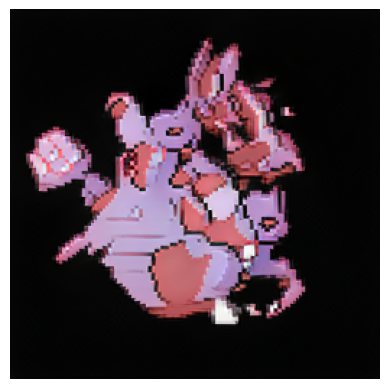

In [ ]:
img = generate_image(device, G, current)

SCALE = 0.5
display_image(img)

In [ ]:
EXPLORE_SIZE = 25

explore = []
for i in range(EXPLORE_SIZE):
  explore.append( np.random.rand(1, 512) - 0.5 )

Direction 0


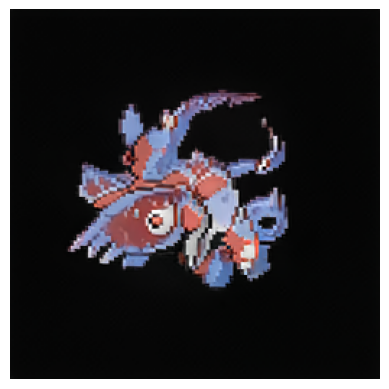

Direction 1


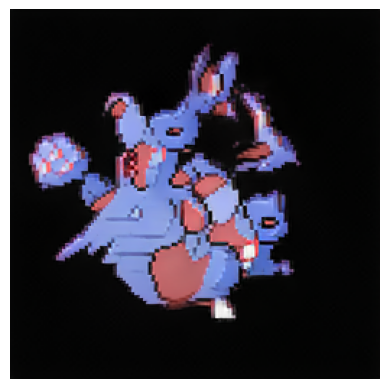

Direction 2


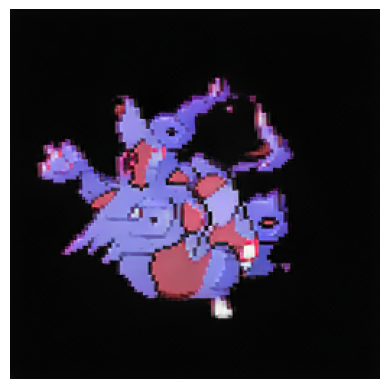

Direction 3


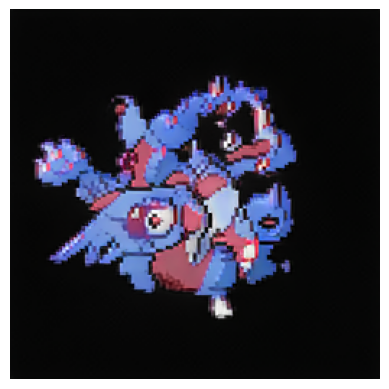

Direction 4


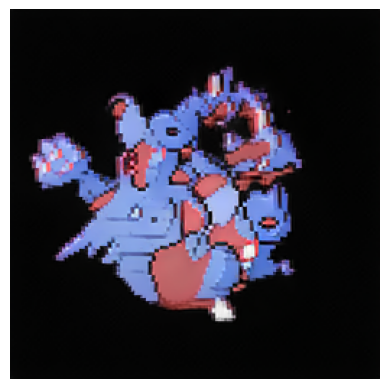

Direction 5


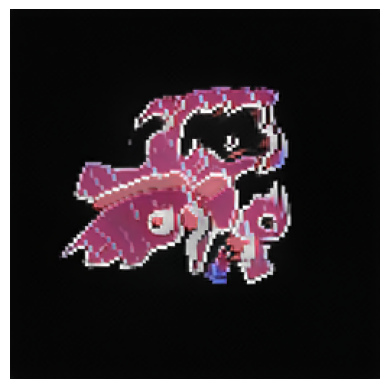

Direction 6


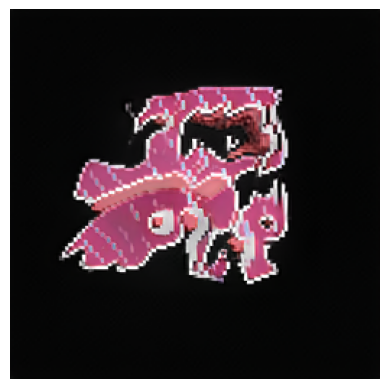

Direction 7


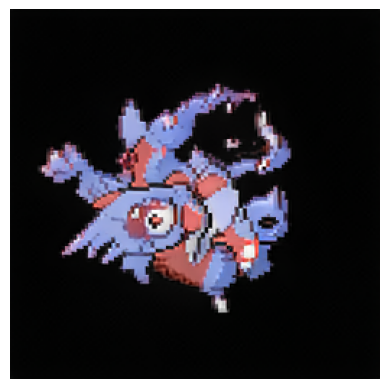

Direction 8


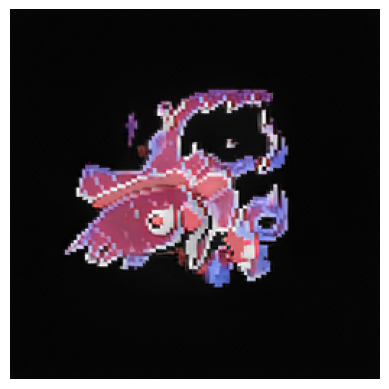

Direction 9


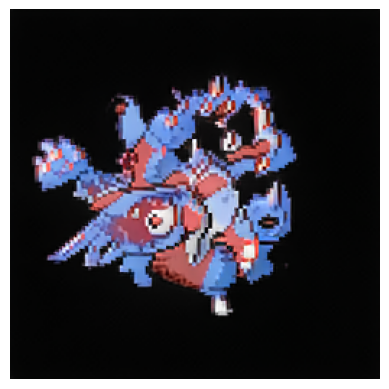

Direction 10


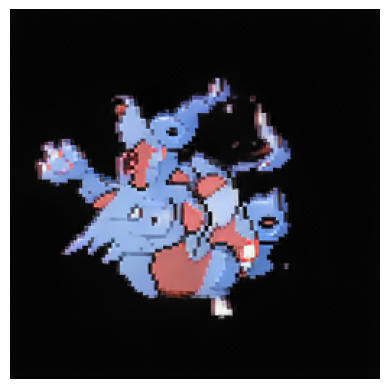

Direction 11


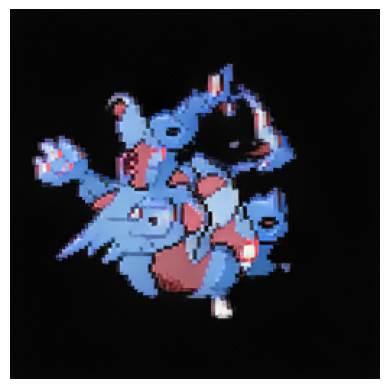

Direction 12


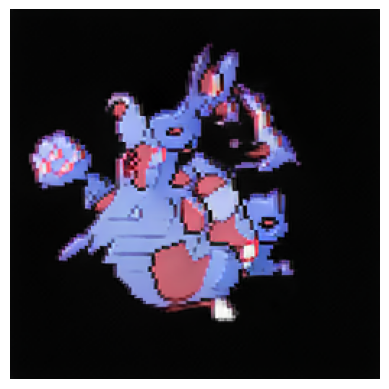

Direction 13


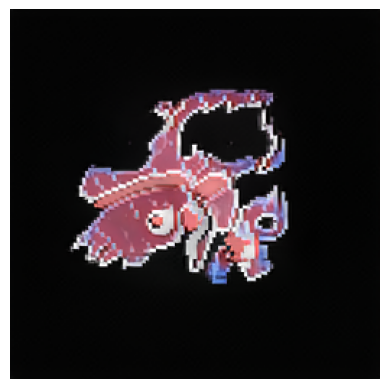

Direction 14


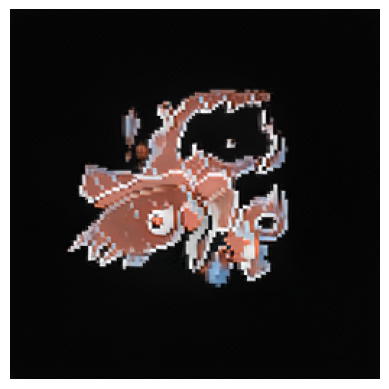

Direction 15


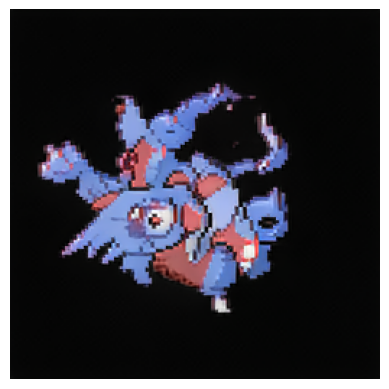

Direction 16


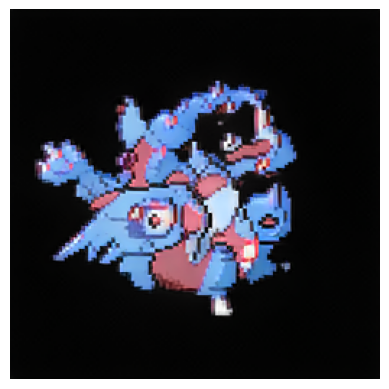

Direction 17


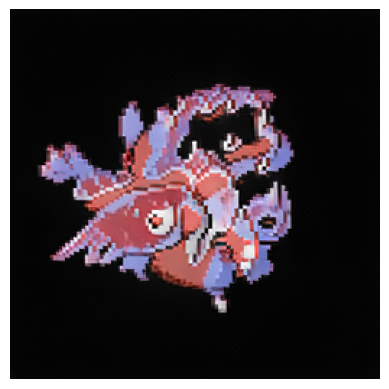

Direction 18


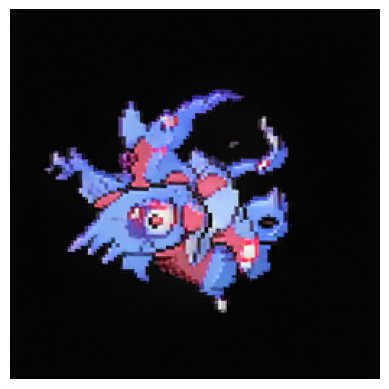

Direction 19


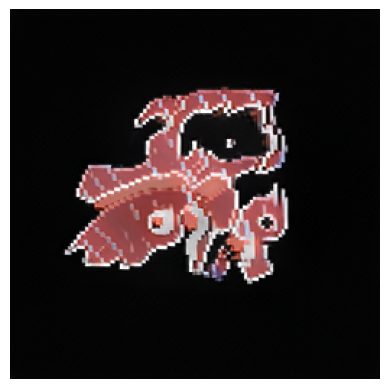

Direction 20


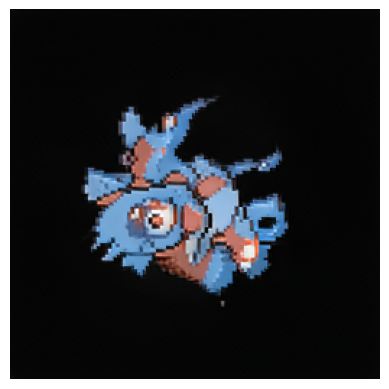

Direction 21


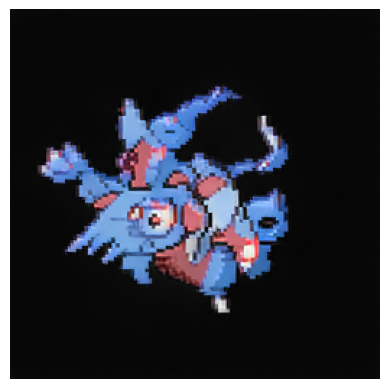

Direction 22


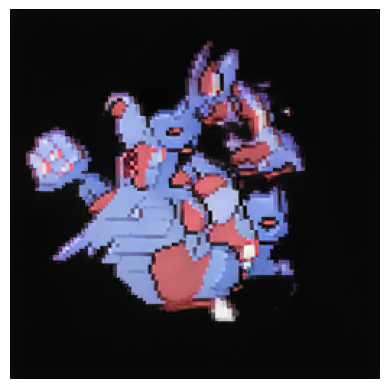

Direction 23


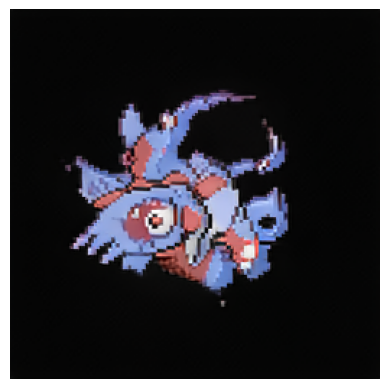

Direction 24


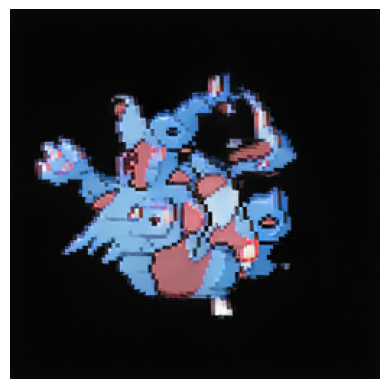

In [ ]:
# HIDE OUTPUT 1
# Choose the direction to move.  Choose -1 for the initial iteration.
MOVE_DIRECTION = 21
SCALE = 0.5

if MOVE_DIRECTION >=0:
  current = current + explore[MOVE_DIRECTION]

for i, mv in enumerate(explore):
  print(f"Direction {i}")
  z = current + mv
  img = generate_image(device, G, z)
  display_image(img)